<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#missing-data" data-toc-modified-id="missing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>missing data</a></span><ul class="toc-item"><li><span><a href="#missingno" data-toc-modified-id="missingno-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>missingno</a></span></li></ul></li><li><span><a href="#dataset-:-mpg" data-toc-modified-id="dataset-:-mpg-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>dataset : mpg</a></span></li><li><span><a href="#drop하기-전에는-유용한-feature를-뽑아낼-수-있는지-확인" data-toc-modified-id="drop하기-전에는-유용한-feature를-뽑아낼-수-있는지-확인-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>drop하기 전에는 유용한 feature를 뽑아낼 수 있는지 확인</a></span></li><li><span><a href="#holdout" data-toc-modified-id="holdout-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>holdout</a></span></li><li><span><a href="#cross-validation" data-toc-modified-id="cross-validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>cross validation</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/8th_ai_lecture_fundamental](https://github.com/realblack0/8th_ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

In [1]:
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# horsepower가 392 non-null 인 것이 눈에 거슬린다.
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## missing data

In [5]:
# missing data를 찾는 방법
# isnull은 NaN이 있는지 True/False로 알려준다. (predicate)
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [6]:
# missing data를 처리하는 방법 중 하나. (좋은 방법은 아님)
# dropna는 NaN이 있는 행을 모두 버린다.
mpg.dropna() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### missingno

In [ ]:
!pip install missingno

In [10]:
# missing value를 찾는 시각화 라이브러리
import missingno

In [9]:
dir(missingno) # 처음보면 dir

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

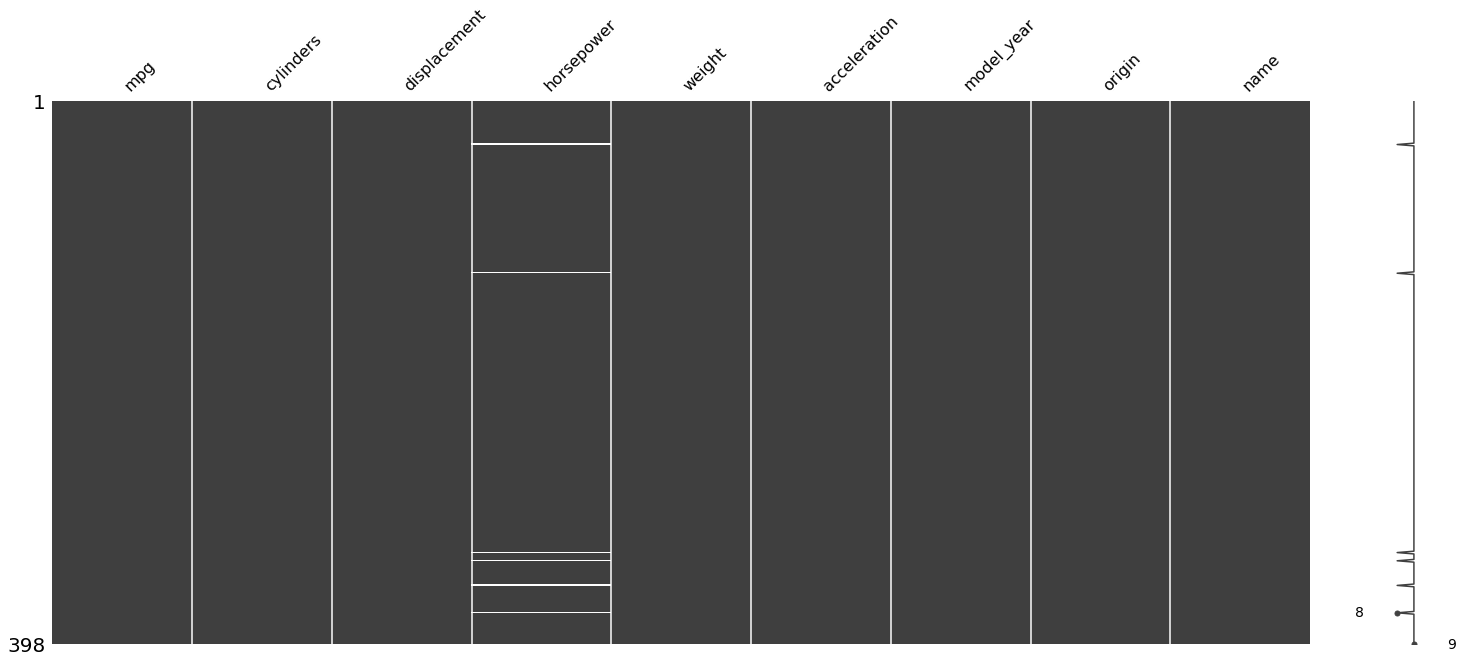

In [8]:
# missing value가 있는 곳에 흰색 줄이 표시된다.
missingno.matrix(mpg)

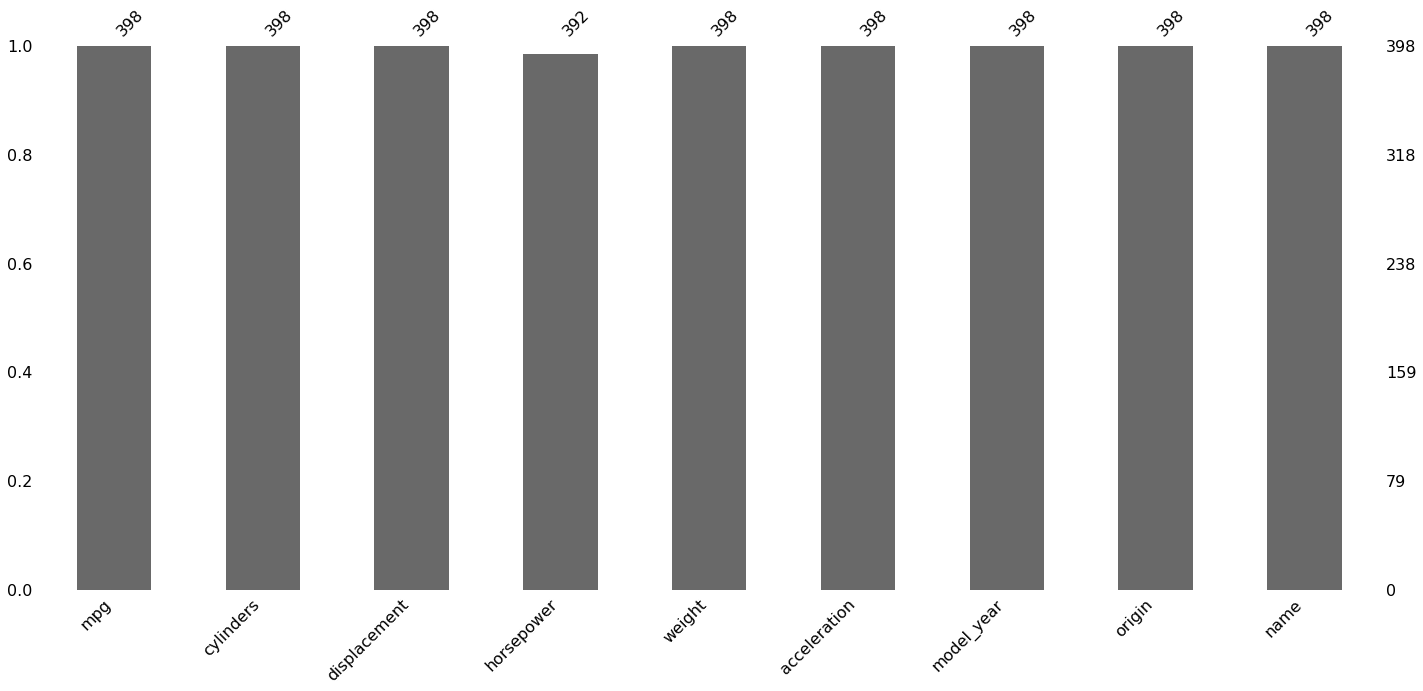

In [12]:
# out을 보면 matplotlib으로 만들어졌음을 알 수 있다. 
missingno.bar(mpg)

In [13]:
import matplotlib.pyplot as plt

(0.9, 1)

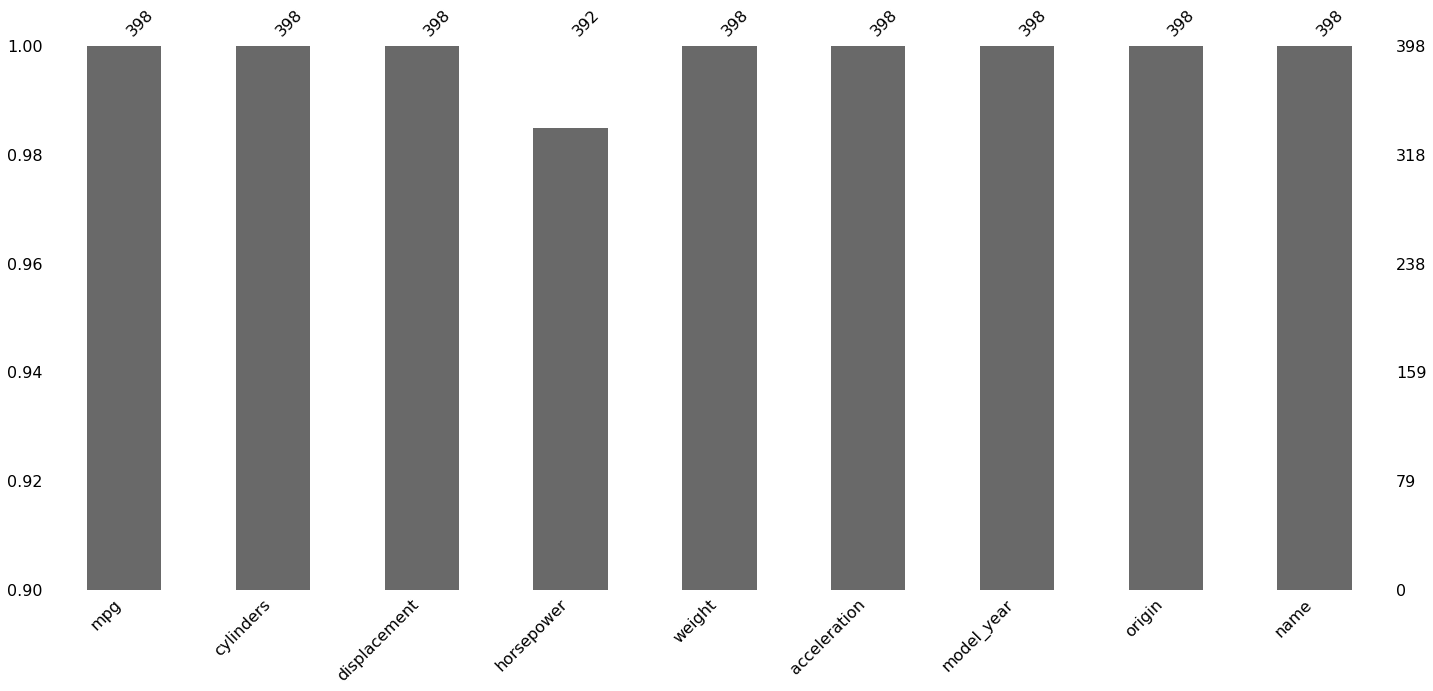

In [17]:
# state machine 방법
# 부분만 잘라내면 missing vale가 더욱 눈에 띈다.
missingno.bar(mpg)
plt.ylim((.9, 1))

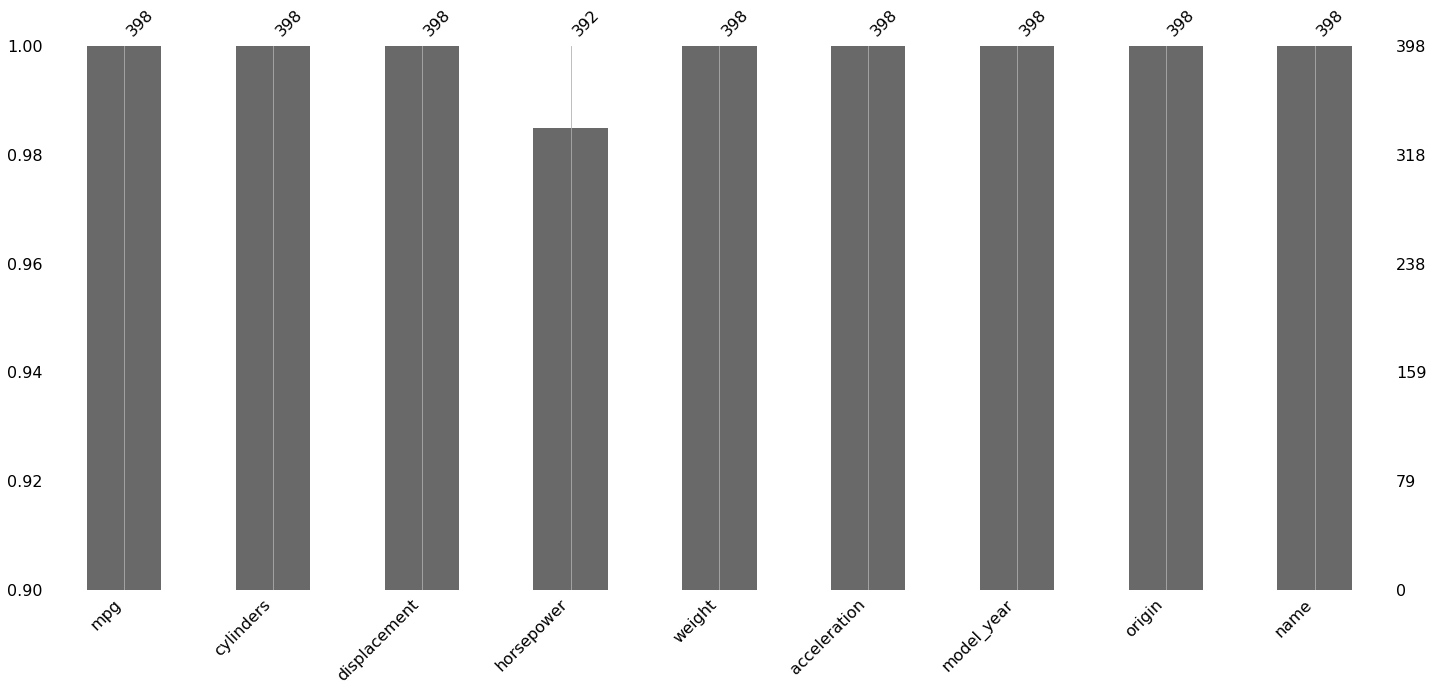

In [18]:
# matplotlib은 쉽게 그릴 수는 없지만, customizing은 잘 할 수 있는 장점이 있다.
missingno.bar(mpg)
plt.ylim((.9, 1))
plt.grid(True)

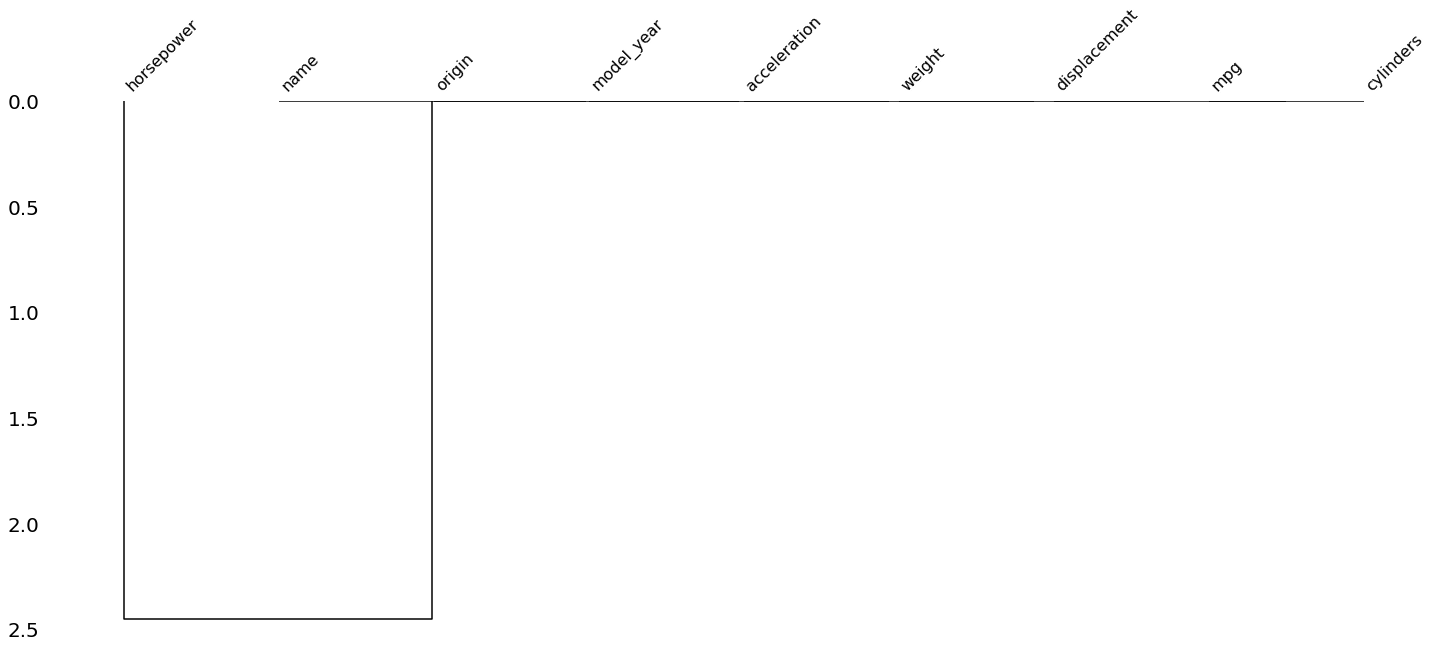

In [19]:
# dedrogram은 hierachical(계층적) 구조를 그려주어서 유용하다.
# 그러나, mgp 데이터셋에서는 크게 유용하지 않다. 
# 데이터 성격에 따라서 missing value가 잘 보이는 시각화가 있다. 
missingno.dendrogram(mpg)

In [75]:
# 이번 수업에서는 missing value를 버리는 것으로 한다. (missing value 처리는 나중에 배운다)
mpg.dropna(inplace=True)

## dataset : mpg

In [24]:
# 값의 종류가 어떤게 있는지, 몇개 있는지 알 수 있다.
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [25]:
# 문자열 Series에서 describe는 value_counts와 비슷한 기능
# 값 종류 수, 최빈값 등을 알 수 있다.
mpg.origin.describe()

count     398
unique      3
top       usa
freq      249
Name: origin, dtype: object

In [26]:
# astype은 데이터의 타입을 바꾼다.
mpg.origin = mpg.origin.astype('category')

In [27]:
# dtype을 category로 바꿔서 cat을 사용할 수 있다.
mpg.origin.cat

In [31]:
# categories로 값의 종류를 알 수 있다.
mpg.origin.cat.categories

Index(['europe', 'japan', 'usa'], dtype='object')

In [32]:
# category type은 문자열(.str) 기능도 사용할 수 있다. 
# 할당하면 자동완성 단축키(tab)를 사용할 수 있다.
m = mpg.origin.str

In [33]:
# one hot encoding
# method 방식 -> 인자 없음
m.get_dummies()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [35]:
import pandas as pd

In [36]:
# 통계에서는 one hot encoding을 더미 변수라고 부른다.
# function 방식 -> 객체를 인자로 넣음. 
pd.get_dummies(mpg.origin)

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


메소드 방식을 이용할 때는 데이터를 인자에 넣지 않고, column 이름만 넣는다.  

In [ ]:
# Error
# method 방식
mpg.drop(mpg.name)

In [90]:
# drop 전에는 중요한 내용을 뽑아낼 수는 없는지 확인을 해봐야한다.
# 이 수업은 분석 보다 인공지능에 초점이 맞춰져 있으므로, drop을 쓰기로 한다.
mpg.drop(columns='name', inplace=True)

In [37]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


## drop하기 전에는 유용한 feature를 뽑아낼 수 있는지 확인

데이터셋 출처 : [Kaggle](https://www.kaggle.com/c/titanic/data)
- 회원가입 필수

In [42]:
import pandas as pd

In [40]:
titanic = pd.read_csv('train.csv')

In [41]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
# Name은 종류가 너무 많아서 feature로서 유의미하지 않아 보인다.
# 그러나 데이터를 필요없다고 막 지울 수 없다. (어떤 잠재의미가 있을 수도 있다.) 
titanic.Name.value_counts()

Andreasson, Mr. Paul Edvin                             1
Fry, Mr. Richard                                       1
Klaber, Mr. Herman                                     1
Beckwith, Mr. Richard Leonard                          1
Ostby, Mr. Engelhart Cornelius                         1
                                                      ..
Moubarek, Master. Gerios                               1
Isham, Miss. Ann Elizabeth                             1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)        1
Hagland, Mr. Ingvald Olai Olsen                        1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Name: Name, Length: 891, dtype: int64

In [49]:
# Data Mining : 데이터에서 어떤 의미를 찾는 것.
# 외국의 경우, 이름에 가문이 표시되는 경우가 많다.
# 이름에서 성별도 알 수 있다.
titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

타이타닉 데이터셋의 name에서 의미를 뽑아내는 예시는 다음 노트북을 참조:  
https://www.kaggle.com/startupsci/titanic-data-science-solutions

## holdout

In [51]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(mpg.iloc[:, 1:], mpg.mpg)

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn = KNeighborsRegressor()

In [ ]:
# ValueError: could not convert string to float: 'usa'
# 머신러닝은 숫자 데이터만 써야 한다. (문자열 데이터 -> 인코딩)
knn.fit(X_train, y_train)

문자열인 origin 컬럼을 one hot encoding 해서 숫자로 바꾼다.

In [76]:
mpg_tidy = pd.concat([mpg, pd.get_dummies(mpg.origin)], axis=1)

In [77]:
mpg_tidy.drop(columns=['origin'], inplace=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(mpg_tidy.iloc[:, 1:], mpg_tidy.mpg)

In [79]:
knn = KNeighborsRegressor()

In [80]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

scikit-learn은 y에는 문자열이 있더라도, 에러를 발생시키지 않는다.  
사람들이 워낙 실수를 많이 해서 classification에서 y는 문자열을 사용해도 되도록 만들었다.(편법)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
iris = sns.load_dataset('iris')

In [83]:
knn = KNeighborsClassifier()

In [85]:
# iris.species는 문자열 dtype이지만 에러를 발생시키지 않는다.
knn.fit(iris.iloc[:, :-1], iris.species)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
# 예측 결과도 문자열로 나온다.
knn.predict([[0,0,0,0]])

array(['setosa'], dtype=object)

iris의 species를 one hot encoding해서 사용해본다.

In [94]:
iris_ti = pd.concat([iris, pd.get_dummies(iris.species)], axis=1)

In [96]:
iris_ti.drop(columns=['species'], inplace=True)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(iris_ti.iloc[:, :-3], iris_ti.iloc[:, -3:])

In [102]:
y_train

,setosa,versicolor,virginica
134,0,0,1
27,1,0,0
36,1,0,0
133,0,0,1
137,0,0,1
...,...,...,...
120,0,0,1
11,1,0,0
77,0,1,0
84,0,1,0


In [99]:
knn = KNeighborsClassifier()

In [103]:
# 소문자(y)는 벡터를 의미하지만, 실제 y_trian은 행렬이다.
# 하지만 에러는 나지 않는다. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
# y(target)가 one hot encoding되어 있으면, 예측도 one hot encoding으로 해준다. 
# 그러나, y(target)은 label 인코딩 하는 것이 관례상 좋다. (다른 패키지와 연동을 위해서)
knn.predict([[3,3,3,3]])

array([[0, 1, 0]], dtype=uint8)

## cross validation

In [105]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


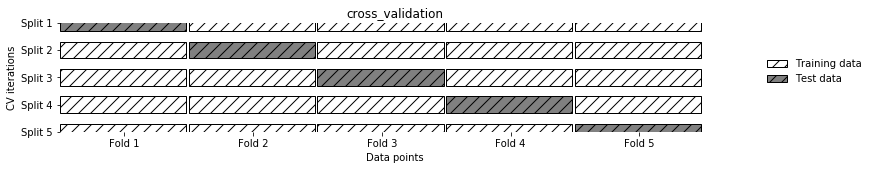

In [106]:
# 데이터셋을 k개로 분할한 뒤, 한개씩 번갈아가 가면서 test set으로 사용한다. (나머지는 모두 train set으로 사용)
# 학습과 성능측정을 총 k번 수행한다.
mglearn.plot_cross_validation.plot_cross_validation()

cross validation은 다음과 같이 사용한다.
- 가장 처음에 알고리즘의 성능을 대강 평가하기 위해서 사용한다.
- 데이터 양이 적을 때 data leakage를 방지하기 위해서 사용한다. 

In [110]:
from sklearn.datasets import load_iris

In [108]:
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.model_selection import cross_val_score

In [111]:
data = load_iris()

In [113]:
lr = LogisticRegression()

In [115]:
cross_val_score(lr, data.data, data.target, cv=10) # default : cv=5

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [116]:
from sklearn.linear_model import Perceptron

In [119]:
# 성능이 Logistic Regresssion보다 떨어진다.
cross_val_score(Perceptron(), data.data, data.target, cv=10)

array([0.66666667, 0.73333333, 0.66666667, 0.73333333, 0.73333333,
       0.66666667, 0.66666667, 0.66666667, 0.86666667, 0.66666667])

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
ms = MinMaxScaler()

In [122]:
data2 = ms.fit_transform(data.data)

In [123]:
# scaling(전처리)만 잘해도 성능이 높아진다.
cross_val_score(Perceptron(), data2, data.target, cv=10)

array([0.73333333, 0.93333333, 0.86666667, 0.8       , 0.93333333,
       0.73333333, 0.86666667, 0.8       , 0.93333333, 0.86666667])

In [124]:
# n_jobs는 사용할 자원의 수를 의미한다.
# n_jobs가 가용한 자원의 수보다 크면, 전체를 사용한다.
# n_jobs가 -1이면 가용한 자원을 모두 사용한다.
cross_val_score(Perceptron(), data2, data.target, cv=10, n_jobs=-1)

array([0.73333333, 0.93333333, 0.86666667, 0.8       , 0.93333333,
       0.73333333, 0.86666667, 0.8       , 0.93333333, 0.86666667])